### Import libraries

In [3]:
import nltk

import numpy as np
import pandas as pd

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,  TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from urllib.parse import urlparse 
import seaborn as sns
import string

from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Download NLTK resources

In [5]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kagis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kagis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kagis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load the dataset

### Train dataset

In [7]:
file_path = 'Data/processed/train.csv'
df_train = pd.read_csv(file_path)
df_train.head(3)

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business


### Test dataset

In [9]:
df_test = pd.read_csv('Data/processed/test.csv')
df_test.head(3)

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment


# 1. Data cleaning

### Checking for missing values

In [11]:
# train dataset
missing_values= df_train.isnull().sum()
print("\n train df missing values per column :\n\n ", missing_values)

# test dataset
missing_values_test = df_test.isnull().sum()
print("\n test df missing values per column :\n\n ", missing_values_test)


 train df missing values per column :

  headlines      0
description    0
content        0
url            0
category       0
dtype: int64

 test df missing values per column :

  headlines      0
description    0
content        0
url            0
category       0
dtype: int64


### View the dataset

In [13]:
print("The training dataset:")
display(df_train.head())

print("The testing dataset:")
display(df_test.head())


The training dataset:


,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


The testing dataset:


,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


### Summary of the dataset
info

In [15]:
print("\nTrain dataset Summary:")
print(df_train.info())

print("\nTest dataset Summary:")
print(df_test.info())


Train dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
None

Test dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB
None


describe

In [8]:
# train_summary = df_train.describe()
# test_summary = df_test.describe() 

# # Concatenate the summary statistics side by side 
# combined_summary = pd.concat([train_summary, test_summary], axis=1, keys=['Train', 'Test'])
# print(combined_summary)

In [17]:
train_summary = df_train.describe(include='object')
test_summary = df_test.describe(include='object') 

print('Train df:')
display(train_summary)

print('\nTest df:')
display(test_summary)

Train df:


,headlines,description,content,url,category
count,5520,5520,5520,5520,5520
unique,5512,5508,5513,5514,5
top,International Education Day 2024: Know why it ...,The university has removed the requirements of...,Grand Slam fever grips tennis fans all over th...,https://indianexpress.com/article/education/kc...,education
freq,2,2,5,2,1520



Test df:


,headlines,description,content,url,category
count,2000,2000,2000,2000,2000
unique,2000,2000,2000,2000,5
top,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
freq,1,1,1,1,400


### Duplicates

In [23]:
duplicates_train = df_train.duplicated().sum()
print(f"Number of duplicate rows in the Train dataset: {duplicates_train}")

duplicates_test = df_test.duplicated().sum()
print(f"\nNumber of duplicate rows in the Test dataset: {duplicates_test}")

Number of duplicate rows in the Train dataset: 0

Number of duplicate rows in the Test dataset: 0


### Dropping unnecessary columns

In [25]:
if 'url' in df_train.columns:
    df_train = df_train.drop(columns='url')
    
print('Train dataset url col dropped:')
display(df_train.head(2))

print('Test dataset url col dropped:')
if 'url' in df_test.columns:
    df_test = df_test.drop(columns='url')

display(df_test.head(2))

Train dataset url col dropped:


,headlines,description,content,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business


Test dataset url col dropped:


,headlines,description,content,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,education


### Text cleaning
Applying text lowercase to remove some noise from capitalisation.

In [27]:
print('Train dataset:')
df_lowered_train = df_train.applymap(lambda x: x.lower() if isinstance(x, str) else x)
display(df_lowered_train.head(1) )

print('\nTest dataset:')
df_lowered_test = df_test.applymap(lambda x: x.lower() if isinstance(x, str) else x)
display(df_lowered_test.head(1) )

Train dataset:


,headlines,description,content,category
0,rbi revises definition of politically-exposed ...,the central bank has also asked chairpersons a...,the reserve bank of india (rbi) has changed th...,business



Test dataset:


,headlines,description,content,category
0,nlc india wins contract for power supply to ra...,state-owned firm nlc india ltd (nlcil) on mond...,state-owned firm nlc india ltd (nlcil) on mond...,business


### Remove punctuation 


In [29]:
# Function to remove punctuation 
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation)) 
    return text

In [31]:
print('train dataset punctuation removed:')
df_puntuated_train = df_lowered_train.applymap(remove_punctuation)
display(df_puntuated_train.head(1))

print('\nTest dataset punctuation removed:')
df_puntuated_test = df_lowered_test.applymap(remove_punctuation)
display(df_puntuated_test.head(1))

train dataset punctuation removed:


,headlines,description,content,category
0,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,business



Test dataset punctuation removed:


,headlines,description,content,category
0,nlc india wins contract for power supply to ra...,stateowned firm nlc india ltd nlcil on monday ...,stateowned firm nlc india ltd nlcil on monday ...,business


### Function to tokenize text

In [35]:
# Initialize the TreebankWordTokenizer 
tokenizer = TreebankWordTokenizer()

In [37]:
# Function to tokenize text using TreebankWordTokenizer

def tokenize_text(text):
    if isinstance(text, str):
        return tokenizer.tokenize(text) 
    return text                           # If text is not a string, return it as is

In [39]:
# Function to apply tokenization to DataFrame 
def tokenize_dataframe(df):
    for column in df.columns:
        if column != 'category': 
            df[column] = df[column].apply(tokenize_text)
    return df

In [54]:
# Applying tokenization to the DataFrame, excluding the 'category' column
print('Train dataset tokenised:')
df_tokenized_train = tokenize_dataframe(df_puntuated_train)
display(df_tokenized_train.head(2))

print('\nTest dataset tokenised:')
df_tokenized_test = tokenize_dataframe(df_puntuated_test)
display(df_tokenized_test.head(2))

Train dataset tokenised:


,headlines,description,content,category
0,"[rbi, revises, definition, of, politicallyexpo...","[the, central, bank, has, also, asked, chairpe...","[the, reserve, bank, of, india, rbi, has, chan...",business
1,"[ndtv, q2, net, profit, falls, 574, to, rs, 55...","[ndtvs, consolidated, revenue, from, operation...","[broadcaster, new, delhi, television, ltd, on,...",business



Test dataset tokenised:


,headlines,description,content,category
0,"[nlc, india, wins, contract, for, power, suppl...","[stateowned, firm, nlc, india, ltd, nlcil, on,...","[stateowned, firm, nlc, india, ltd, nlcil, on,...",business
1,"[sbi, clerk, prelims, exams, dates, announced,...","[sbi, clerk, prelims, exam, the, sbi, clerk, p...","[sbi, clerk, prelims, exam, the, state, bank, ...",education


### lemmatization

In [41]:
lemmatizer = WordNetLemmatizer()

In [43]:
def lemmatize_text(text):
    if isinstance(text, str):
        return lemmatizer.lemmatize(text) 
    return text                           # If text is not a string, return it as is

In [50]:
# Function to apply tokenization to DataFrame 
def lemmatize_dataframe(df):
    for column in df.columns:
        if column != 'category': 
            df[column] = df[column].apply(lemmatize_text)
    return df

In [56]:
print('Train dataset lemmatised:')
df_lemmatized_train = lemmatize_dataframe(df_tokenized_train)
display(df_lemmatized_train.head(2))

print('\nTest dataset lemmatised:')
df_lemmatized_test = lemmatize_dataframe(df_tokenized_test)
display(df_lemmatized_test.head(2))

Train dataset lemmatised:


,headlines,description,content,category
0,"[rbi, revises, definition, of, politicallyexpo...","[the, central, bank, has, also, asked, chairpe...","[the, reserve, bank, of, india, rbi, has, chan...",business
1,"[ndtv, q2, net, profit, falls, 574, to, rs, 55...","[ndtvs, consolidated, revenue, from, operation...","[broadcaster, new, delhi, television, ltd, on,...",business



Test dataset lemmatised:


,headlines,description,content,category
0,"[nlc, india, wins, contract, for, power, suppl...","[stateowned, firm, nlc, india, ltd, nlcil, on,...","[stateowned, firm, nlc, india, ltd, nlcil, on,...",business
1,"[sbi, clerk, prelims, exams, dates, announced,...","[sbi, clerk, prelims, exam, the, sbi, clerk, p...","[sbi, clerk, prelims, exam, the, state, bank, ...",education


### Remove stopwords

In [58]:
# Defining the set of stop words
stop_words = set(stopwords.words('english'))

In [60]:
# Function to remove stop words from text 
def remove_stopwords(tokens): 
    if isinstance(tokens, list): 
        return [word for word in tokens if word.lower() not in stop_words] 
    return tokens # If the input is not a list, return it as is

In [62]:
def remove_stopwords_from_dataframe(df): 
    for column in df.columns:
        if column != 'category': 
            df[column] = df[column].apply(remove_stopwords)
    return df

In [80]:
print('Train dataset stopwords removed:')
df_clean_train = remove_stopwords_from_dataframe(df_lemmatized_train)
display(df_clean_train.head(2))

print('\nTest dataset stopwords removed:')
df_clean_test= remove_stopwords_from_dataframe(df_lemmatized_test)
display(df_clean_test.head(2))

Train dataset stopwords removed:


,headlines,description,content,category
0,"[rbi, revises, definition, politicallyexposed,...","[central, bank, also, asked, chairpersons, chi...","[reserve, bank, india, rbi, changed, definitio...",business
1,"[ndtv, q2, net, profit, falls, 574, rs, 555, c...","[ndtvs, consolidated, revenue, operations, rs,...","[broadcaster, new, delhi, television, ltd, mon...",business



Test dataset stopwords removed:


,headlines,description,content,category
0,"[nlc, india, wins, contract, power, supply, ra...","[stateowned, firm, nlc, india, ltd, nlcil, mon...","[stateowned, firm, nlc, india, ltd, nlcil, mon...",business
1,"[sbi, clerk, prelims, exams, dates, announced,...","[sbi, clerk, prelims, exam, sbi, clerk, prelim...","[sbi, clerk, prelims, exam, state, bank, india...",education


### Count words in df

In [82]:
def count_unique_words(df): 
    unique_words = set()
    for column in df.columns: 
        if column != 'category': 
            df[column].apply(lambda tokens: unique_words.update(tokens)
                             if isinstance(tokens, list) else tokens) 
    return len(unique_words)

In [84]:
print('Train dataset unique words:')
unique_word_count_test = count_unique_words(df_clean_train)
print(unique_word_count_test)

print('\nTest dataset unique words:') 
unique_word_count_test = count_unique_words(df_clean_test)
print(unique_word_count_test)


Train dataset unique words:
58102

Test dataset unique words:
34324


In [86]:
# Function to combine tokenized text features into a single string 
def combine_tokens(row): 
    combined_text = [] 
    for column in row.index:
        if column != 'category':
            combined_text.extend(row[column]) 
    return ' '.join(combined_text) 

# Applying the function to combine tokenized text features into a single column 
df_clean_train['combined_text'] = df_clean_train.apply(combine_tokens, axis=1)

print('Train dataset text columns combined:') 
# Display the updated DataFrame 
display(df_clean_train[[ 'combined_text', 'category']].head(2))

# Applying the function to combine tokenized text features into a single column 
df_clean_test['combined_text'] = df_clean_test.apply(combine_tokens, axis=1)

print('\nTest dataset text columns combined:') 
# Display the updated DataFrame 
display(df_clean_test[[ 'combined_text', 'category']].head(2))

Train dataset text columns combined:


,combined_text,category
0,rbi revises definition politicallyexposed pers...,business
1,ndtv q2 net profit falls 574 rs 555 crore impa...,business



Test dataset text columns combined:


,combined_text,category
0,nlc india wins contract power supply rajasthan...,business
1,sbi clerk prelims exams dates announced admit ...,education


# 2.Exploratory Data Analysis

### Number of labels

In [88]:
print('Train dataset labels:') 
unique_category_label_train = list(df_clean_train['category'].unique())
print(unique_category_label_train)

print('\nTest dataset labels:') 
unique_category_label_test = list(df_clean_test['category'].unique())
print(unique_category_label_test)


Train dataset labels:
['business', 'sports', 'entertainment', 'education', 'technology']

Test dataset labels:
['business', 'education', 'entertainment', 'technology', 'sports']


Train dataset value count graph:


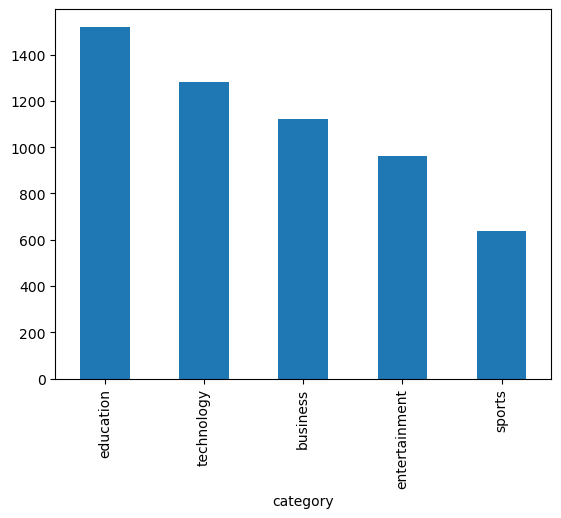

In [90]:
print('Train dataset value count graph:') 
df_clean_train['category'].value_counts().plot(kind = 'bar')
plt.show()

In [92]:
print('Train dataset value counts:')
df_clean_train['category'].value_counts()

Train dataset value counts:


category
education        1520
technology       1280
business         1120
entertainment     960
sports            640
Name: count, dtype: int64

# 3. Text Feature Extraction

### Features

In [94]:
# def vectorise_features(df, text_column, max_features=None, min_df=0.01, max_df=0.9):
# 22% at 0.001, 10000 max_feats, same 2000 max (1,2)
def vectorise_features(df, text_column):
    vectoriser = CountVectorizer(
        analyzer='word',
        ngram_range=(1, 2),
        # min_df=0.001,
        # max_df=0.9,
        max_features=10000,
        stop_words='english'
    )
    # vectoriser = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=10000)
    X_count = vectoriser.fit_transform(df[text_column])
    return X_count, vectoriser

In [97]:
# Vectorise train and test data
X_count_train, vectoriser_train = vectorise_features(df_clean_train, 'combined_text')
X_count_test, vectoriser_test = vectorise_features(df_clean_test, 'combined_text')

In [99]:
print('Vectorised X_count_train shape:', X_count_train.shape)
print('Vectorised X_count_test shape:', X_count_test.shape)

Vectorised X_count_train shape: (5520, 10000)
Vectorised X_count_test shape: (2000, 10000)


In [101]:
print('Train feature names: ', vectoriser_train.get_feature_names_out())
print('Test feature names: ', vectoriser_test.get_feature_names_out())

Train feature names:  ['007' '01' '011' ... 'zoya' 'zoya akhtar' 'zuckerberg']
Test feature names:  ['00' '02' '03' ... 'zoom' 'zoya' 'zoya akhtar']


In [103]:
# Convert sparse matrix to array
X_train_vectorised = X_count_train.toarray()
# X_train_vectorised

X_test_vectorised = X_count_test.toarray()
# X_test_vectorised

### Response Variable

In [105]:
def encode_labels(df, column_name):
    # Encode target labels
    le = LabelEncoder()

    # Fit label encoder and return encoded labels
    encoded_labels = le.fit_transform(df[column_name])
    return encoded_labels, le

In [107]:
# Encode target variable for train and test data
y_train_encoded, label_encoder_train = encode_labels(df_clean_train, 'category')
y_test_encoded, label_encoder_test = encode_labels(df_clean_test, 'category')

In [109]:
print('Encoded train response variable: ', y_train_encoded)
print('Encoded test response variable: ', y_test_encoded)

Encoded train response variable:  [0 0 0 ... 4 4 4]
Encoded test response variable:  [0 1 2 ... 2 4 2]


In [111]:
# Extract class labels
train_category_labels = list(label_encoder_train.classes_)
print('Train label classes: ', train_category_labels)

test_category_labels = list(label_encoder_test.classes_)
print('Test label classes: ', test_category_labels)

Train label classes:  ['business', 'education', 'entertainment', 'sports', 'technology']
Test label classes:  ['business', 'education', 'entertainment', 'sports', 'technology']


# 4. Resampling

### Balancing the training data

In [113]:
# Separating DataFrame by category
df_education = df_clean_train[df_clean_train['category'] == 'education']
df_technology = df_clean_train[df_clean_train['category'] == 'technology']
df_business = df_clean_train[df_clean_train['category'] == 'business']
df_entertainment = df_clean_train[df_clean_train['category'] == 'entertainment']
df_sports = df_clean_train[df_clean_train['category'] == 'sports']

# Setting the target number of samples for each class
target_samples = 1000

# Downsampling majority classes
df_education_downsampled = resample(df_education, replace=False, n_samples=target_samples, random_state=42)
df_technology_downsampled = resample(df_technology, replace=False, n_samples=target_samples, random_state=42)
df_business_downsampled = resample(df_business, replace=False, n_samples=target_samples, random_state=42)

# Upsampling minority classes
df_entertainment_upsampled = resample(df_entertainment, replace=True, n_samples=target_samples, random_state=42)
df_sports_upsampled = resample(df_sports, replace=True, n_samples=target_samples, random_state=42)

# Combining the balanced DataFrames
df_balanced_train = pd.concat([
    df_education_downsampled,
    df_technology_downsampled,
    df_business_downsampled,
    df_entertainment_upsampled,
    df_sports_upsampled
])

# Shuffling the DataFrame
df_balanced_train = df_balanced_train.sample(frac=1, random_state=42).reset_index(drop=True)

# Displaying the balanced DataFrame
print("Balanced Category Counts:\n", df_balanced_train['category'].value_counts())


Balanced Category Counts:
 category
technology       1000
business         1000
education        1000
entertainment    1000
sports           1000
Name: count, dtype: int64


Train data set:


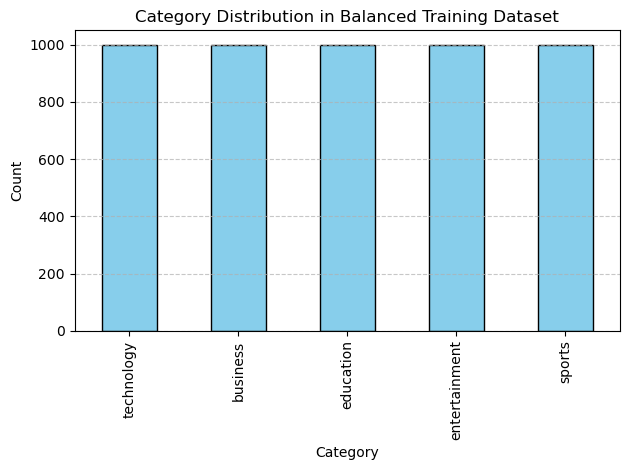

In [119]:

print('Train data set:')
# Replace 'df_balanced_trained' with the correct variable name 'df_balanced_train'
df_balanced_train['category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution in Balanced Training Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# [Might remove!!!]

In [121]:
# Before resampling, stitch our features and labels together
train_data_transformed = np.concatenate([X_train_vectorised, y_train_encoded[:,np.newaxis]], axis=1)

In [123]:
def balance_classes(array, class_size, random_state=27):
    """
    Balances a NumPy array by upsampling or downsampling each class to the specified class size.

    Parameters:
        array (np.ndarray): The input NumPy array where the last column contains class labels.
        class_size (int): The desired number of samples per class.
        random_state (int): Random seed for reproducibility (default: 27).

    Returns:
        np.ndarray: A balanced NumPy array with all classes adjusted to the specified size.
    """
    resampled_classes = []
    # Get unique class labels from the last column
    class_labels = np.unique(array[:, -1])

    # For each class
    for label in class_labels:
        # Get all rows corresponding to the current class
        label_data = array[array[:, -1] == label]

        if len(label_data) < class_size:
            # Upsample
            label_resampled = resample(
                label_data,
                replace=True,  # Sample with replacement to upsample
                n_samples=class_size,
                random_state=random_state
            )
        else:
            # Downsample
            label_resampled = resample(
                label_data,
                replace=False,  # Sample without replacement to downsample
                n_samples=class_size,
                random_state=random_state
            )

        # Append the resampled data for this class
        resampled_classes.append(label_resampled)

    # Combine all resampled classes and shuffle
    balanced_array = np.vstack(resampled_classes)
    np.random.seed(random_state)
    np.random.shuffle(balanced_array)

    return balanced_array


In [125]:
class_size = 1000

train_data_balanced = balance_classes(train_data_transformed, class_size)

In [127]:
def plot_class_distribution(before_balancing, balanced_data, category_names):
    """
    Plots two bar charts side by side for original and resampled class distributions.
    
    Parameters:
    - before_balancing (numpy array): The original data (before balancing).
    - balanced_data (numpy array): The resampled (balanced) data.
    - category_names (list): List of category names corresponding to class labels.
    """
    
    # Map the numeric labels to category names using the list
    before_labels_list = before_balancing[:, -1]  # Original class labels
    after_labels_list = balanced_data[:, -1]     # Resampled class labels
    
    before_labels_words = [category_names[int(label)] for label in before_labels_list]
    after_labels_words = [category_names[int(label)] for label in after_labels_list]
    
    # Count the occurrences of each category in both arrays
    before_counts = pd.Series(before_labels_words).value_counts()
    after_counts = pd.Series(after_labels_words).value_counts()
    
    # Ensure the counts are aligned by category (fill missing categories with 0)
    all_categories = category_names
    # before_counts = before_counts.reindex(all_categories, fillvalue=0)
    # after_counts = after_counts.reindex(all_categories, fillvalue=0)
    
    # Plot the graphs side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot original class distribution (before balancing)
    ax1.bar(before_counts.index, before_counts.values, color='skyblue', edgecolor='black')
    ax1.set_title('Original Class Distribution')
    ax1.set_xlabel('Category')
    ax1.set_ylabel('Count')
    ax1.set_xticklabels(before_counts.index, rotation=45)
    
    # Plot resampled class distribution (after balancing)
    ax2.bar(after_counts.index, after_counts.values, color='lightgreen', edgecolor='black')
    ax2.set_title('Resampled Class Distribution')
    ax2.set_xlabel('Category')
    ax2.set_ylabel('Count')
    ax2.set_xticklabels(after_counts.index, rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

Train data before and after resampling: 



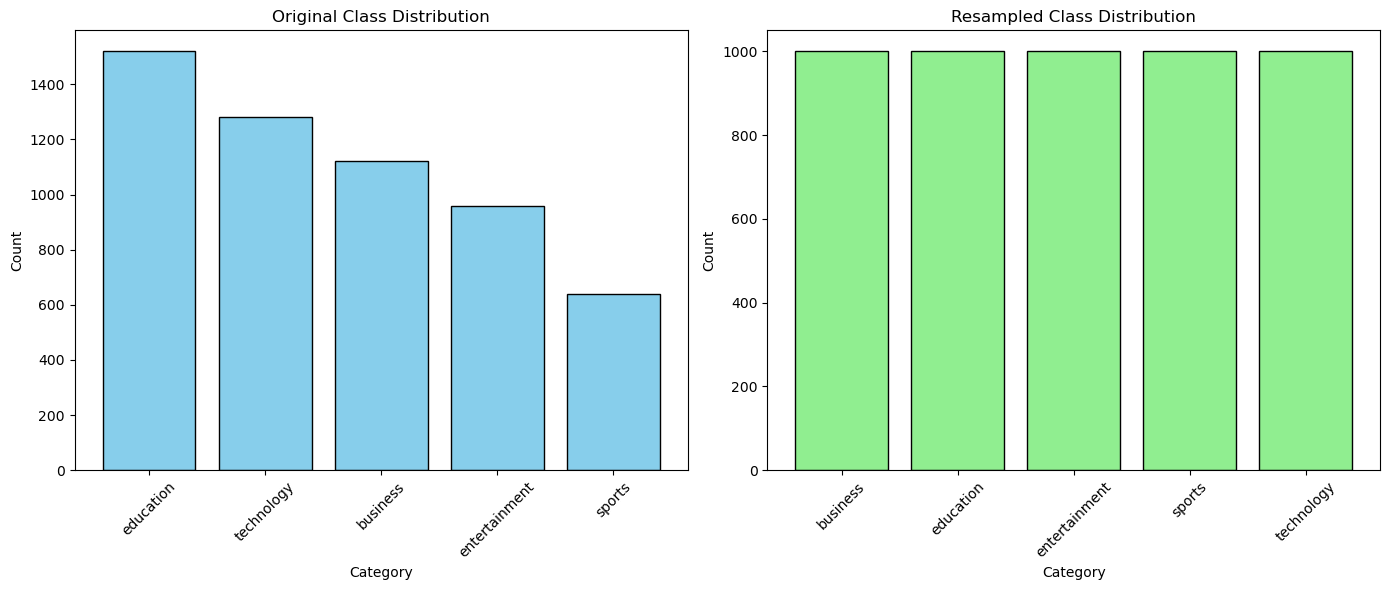

In [129]:
category_labels = list(label_encoder_train.classes_)

print('Train data before and after resampling: \n')
plot_class_distribution(train_data_transformed, train_data_balanced, category_labels)

In [131]:
train_data_balanced.shape

(5000, 10001)

### Split resampled data into X and y

In [134]:
X_resampled = train_data_balanced[:,:-1]
X_resampled.shape

(5000, 10000)

In [136]:
y_resampled = train_data_balanced[:,-1]
print(y_resampled.shape, y_resampled)

(5000,) [0 1 2 ... 4 3 3]


# [Might remove!!!]

# 5. Modeling

## Train test split with balanced data

In [138]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [140]:
display(X_train.shape, X_val.shape)

(4000, 10000)

(1000, 10000)

In [142]:
X_test = X_test_vectorised
y_test = y_test_encoded

## Logistic Regression Model

In [55]:
# def logistic_regression(X_train, y_train, multi_class='ovr'):
#     model = LogisticRegression(multi_class=multi_class)
#     model.fit(X_train, y_train)

#     # y_pred = model.predict(X_val)
#     # accuracy = accuracy_score(y_val, y_pred)
#     return model

In [144]:
def logistic_regression(X_train, y_train, X_val, y_val, multi_class='ovr', random_state=42):
    """ Train and evaluate a logistic regression model. """
    
    # Initialise and train the logistic regression model
    model = LogisticRegression(multi_class=multi_class, random_state=random_state, class_weight='balanced', solver='lbfgs', penalty='l2', C=2)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, target_names=category_labels)
    
    metrics = {
        "accuracy": accuracy,
        "classification_report": report
    }
    
    print(f"Accuracy: {accuracy:}")
    print("\nClassification Report:")
    print(report)
    
    return model, y_pred, metrics


In [146]:
# Train the model and evaluate on validation set  (lr - logistic regression)
lr_model, y_val_pred_lr, lr_val_metrics = logistic_regression(X_train, y_train, X_val, y_val)

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.98      0.98       200
    education       0.99      0.99      0.99       200
entertainment       1.00      1.00      1.00       200
       sports       1.00      1.00      1.00       200
   technology       0.97      0.97      0.97       200

     accuracy                           0.99      1000
    macro avg       0.99      0.99      0.99      1000
 weighted avg       0.99      0.99      0.99      1000



In [148]:
# Evaluate model on test set  (lr - logistic regression)
lr_model, y_test_pred_lr, lr_test_metrics = logistic_regression(X_train, y_train, X_test, y_test)

Accuracy: 0.363

Classification Report:
               precision    recall  f1-score   support

     business       0.41      0.10      0.16       400
    education       0.66      0.76      0.71       400
entertainment       0.35      0.08      0.13       400
       sports       0.26      0.59      0.36       400
   technology       0.25      0.28      0.27       400

     accuracy                           0.36      2000
    macro avg       0.39      0.36      0.33      2000
 weighted avg       0.39      0.36      0.33      2000



The model achieves only 36.3% accuracy, close to random guessing for a 5-class problem (random guessing would give ~20% accuracy).
Precision and Recall:
Categories like "education" perform relatively well (precision: 0.66, recall: 0.76), but others like "sports" and "technology" are significantly lower.
This suggests that the model struggles with separating certain classes, likely due to overlapping feature distributions.

If classes have uneven distributions in the training data, it can lead to biased predictions.Macro vs Weighted Avg: Macro average metrics reflect poor performance across most classes, while weighted averages are slightly better due to more samples in certain classes

Scaled appropriately using normalization

In [154]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [156]:

model = LogisticRegression(class_weight='balanced', random_state=42)


In [160]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_


KeyboardInterrupt: 

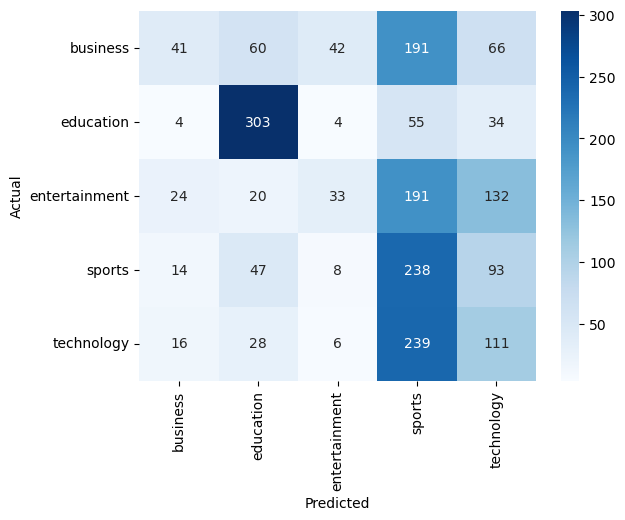

In [182]:
# Confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [165]:
y_test_pred = model.predict(X_test)  # Use for NEW data

 # Metrics Calculation
 accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print(f"Accuracy on test data: {accuracy:.2f}")
print("Classification Report on test data:")
print(report)

## Random Forest Model

In [174]:
# def random_forest(X_train, y_train, X_val, y_val, n_estimators=50, max_depth=5, min_samples_leaf=10, random_state=42):
def random_forest(X_train, y_train, X_val, y_val, n_estimators=200, max_depth=30, min_samples_leaf=2, random_state=42):
    """
    Trains a Random Forest classifier, evaluates its performance on the validation set,
    and prints the validation accuracy and classification report. 
    """
    # Initialise the model
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        random_state=random_state
    )
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, target_names=category_labels)
    
    metrics = {
        "accuracy": accuracy,
        "classification_report": report
    }

    print(f"Accuracy: {accuracy:}")
    print("\nClassification Report:")
    print(report)
    
    return model, y_pred, metrics


In [184]:
# Train the model and evaluate on validation set
forest, y_val_pred_rf, forest_val_metrics = random_forest(X_train, y_train, X_val, y_val)

Accuracy: 0.966

Classification Report:
               precision    recall  f1-score   support

     business       0.95      0.97      0.96       200
    education       0.99      0.98      0.99       200
entertainment       0.99      0.94      0.97       200
       sports       0.99      0.98      0.99       200
   technology       0.91      0.94      0.93       200

     accuracy                           0.97      1000
    macro avg       0.97      0.97      0.97      1000
 weighted avg       0.97      0.97      0.97      1000



In [186]:
# Evaluate model on test set
forest, y_test_pred_rf, forest_test_metrics = random_forest(X_train, y_train, X_test, y_test)

Accuracy: 0.4305

Classification Report:
               precision    recall  f1-score   support

     business       0.37      0.05      0.09       400
    education       0.73      0.67      0.70       400
entertainment       0.66      0.43      0.52       400
       sports       0.31      0.56      0.40       400
   technology       0.30      0.43      0.35       400

     accuracy                           0.43      2000
    macro avg       0.47      0.43      0.41      2000
 weighted avg       0.47      0.43      0.41      2000



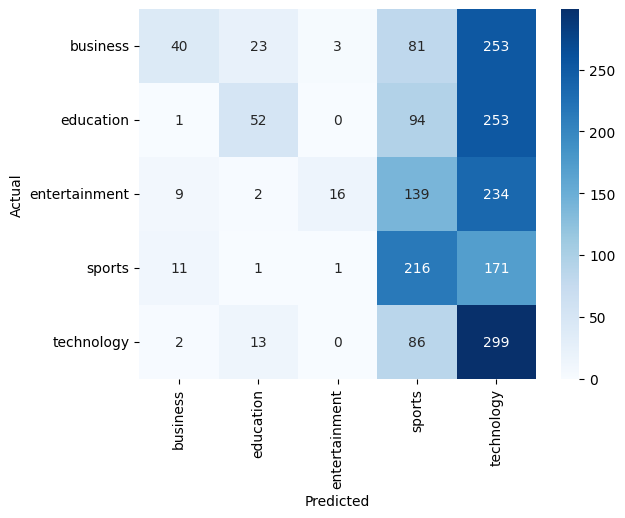

In [64]:
# Confusion matrix for test set
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when splitting
}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1_macro',  # Optimize for F1-score (macro average)
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Verbosity level for progress updates
    n_jobs=-1  # Use all available processors
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and corresponding F1-score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(X_test)

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

## Support Vector Machine

In [192]:
def svm_model(X_train, y_train, X_val, y_val, kernel='rbf'):
    # Initialise the model
    model = SVC(kernel=kernel,
                decision_function_shape='ovr',
                C=1)
                # gamma='scale')

    # Train model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val)
    
    # Calculate accuracy and classification report
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, target_names=category_labels)
    
    metrics = {
        "accuracy": accuracy,
        "classification_report": report
    }

    print(f"Accuracy: {accuracy:}")
    print("\nClassification Report:")
    print(report)
    
    return model, y_pred, metrics

In [194]:
# Train the model and evaluate on validation set
svm, y_val_pred_svm, svm_val_metrics = svm_model(X_train, y_train, X_val, y_val)

Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

     business       0.89      0.98      0.94       200
    education       0.99      0.96      0.98       200
entertainment       1.00      0.99      0.99       200
       sports       1.00      0.97      0.99       200
   technology       0.97      0.94      0.96       200

     accuracy                           0.97      1000
    macro avg       0.97      0.97      0.97      1000
 weighted avg       0.97      0.97      0.97      1000



In [196]:
# Evaluate model on test set
svm, y_test_pred_svm, svm_test_metrics = svm_model(X_train, y_train, X_test, y_test)

Accuracy: 0.366

Classification Report:
               precision    recall  f1-score   support

     business       0.35      0.51      0.41       400
    education       0.96      0.48      0.64       400
entertainment       0.00      0.00      0.00       400
       sports       0.38      0.27      0.32       400
   technology       0.25      0.57      0.35       400

     accuracy                           0.37      2000
    macro avg       0.39      0.37      0.34      2000
 weighted avg       0.39      0.37      0.34      2000



he output indicates poor performance for the SVM model. It suggests the need for upgrades in data preprocessing, feature scaling, model parameters

In [203]:
# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Define and Optimize the SVM Model with Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for 'rbf'
    'kernel': ['rbf', 'linear'],  # Kernel types
}

svm = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='f1_macro', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


best_svm = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_test_pred_svm = best_svm.predict(X_test_scaled)
svm_test_metrics = classification_report(y_test, y_test_pred_svm)
test_accuracy = accuracy_score(y_test, y_test_pred_svm)


print("Accuracy:", test_accuracy)
print("\nClassification Report:\n", svm_test_metrics)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


KeyboardInterrupt: 

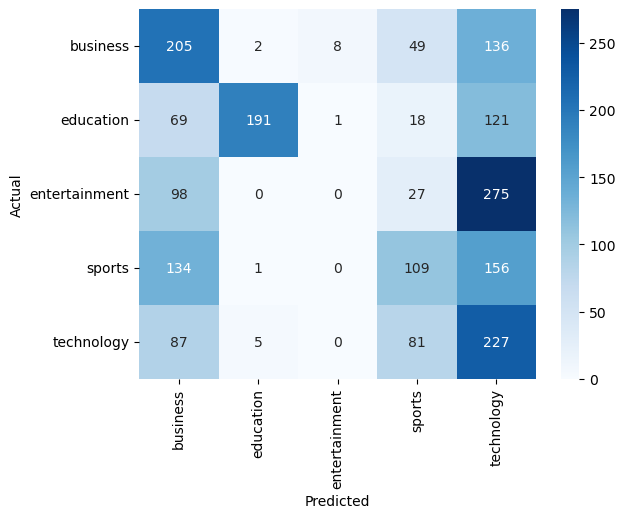

In [205]:
# Confusion matrix for test set
cm_svm = confusion_matrix(y_test, y_test_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [69]:
# # Tune SVM
# parameters = {'kernel':('linear', 'rbf'), 
#               'C':(0.25,1.0)}
#               # 'gamma': (1,2)}

# svm_grid = SVC()
# # Initialise GridSearchCV
# grid_search = GridSearchCV(svm_grid, parameters)

# # Fit the GridSearchCV
# grid_search.fit(X_train,y_train)
# # Ran forever!

In [70]:
# y_opt = grid_search.predict(X_test)
# print("The accuracy for tuned model is: ", accuracy_score(y_test, y_opt))

## Model Evaluation Metrics

In [ ]:
# Scale the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and Optimize the SVM Model with Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  # Kernel coefficient for 'rbf'
    'kernel': ['rbf', 'linear'],  # Kernel types
}

svm = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='f1_macro', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_svm = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

#  Evaluate on the Test Set
y_test_pred_svm = best_svm.predict(X_test_scaled)
svm_test_metrics = classification_report(y_test, y_test_pred_svm)
test_accuracy = accuracy_score(y_test, y_test_pred_svm)

# Display Results
print("Accuracy:", test_accuracy)
print("\nClassification Report:\n", svm_test_metrics)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
